In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context='poster')

In [2]:
%run asexual_model.py

# The Asexual Model

In our model, a population consists of two age classes, juveniles ($J$) and adults ($A$), and two morphs, Eu and St. We assume the morphology of an offspring to be solely determined by the genotype of the parent: a genotype adult would produce a juvenile of Eu morph with probability $\delta_i$ and a juvenile of St morph with probability $1 - \delta_i$. At each step, fraction  of juveniles develop into adults. Each adult would produce $f$ offspring in each step.

Only a fraction ($b_{j,i}$) of potentially predatory encounters between a juvenile (potential prey) of genotype $j$ and an Eu adult (potential predator) of genotype $i$ is realized. When such an encounter occurs, the propensity of a Eu adults to prey on a juvenile decreases with increasing genomic relatedness ($r$), where $r_{i,j} = r_{j,i}$ and two individuals from the same genotype are fully related, i.e., $r_{i,i} = 1$. In addition to genomic relatedness, predation depends the genotype-dependent ability of the predator to perform kin recognition ($\chi_i$). We assume  $\chi_i = \chi_j$. 

In the two-genotype version of our model, we consider two populations, each comprising of $x$ or $y$ genotype. Considering the aforementioned life cycle, the dynamics of genotype $x$ would be:


$ x_{\mathrm{St},J}^{t+1}=x_{\mathrm{St},J}^{t}+f (1- \delta_x) (x_{\mathrm{St},A}^t + x_{\mathrm{Eu},A}^t)-\lambda_{x}x_{\mathrm{St},J}^{t}-c x_{\mathrm{St},J}^{t}\sum_{i=x,y} i_{\mathrm{Eu},A}^{t}b_{x,i}(1 -\chi_{i}r_{x,i}) \quad (1a)$ 

$x_{\mathrm{St},A}^{t+1}=x_{\mathrm{St},A}^{t}+\lambda_{x}x_{\mathrm{St},J}^{t}-x_{\mathrm{St},A}^{t}\dfrac{f}{K}\sum_{i=x,y}i_{A}^{t} \quad (1b)$ 

$x_{\mathrm{Eu},J}^{t+1}=x_{\mathrm{Eu},J}^{t}+f \delta_x (x_{\mathrm{Eu},A}^t + x_{\mathrm{St},A}^t) -\lambda_{x}x_{\mathrm{Eu},J}^{t}-c x_{\mathrm{Eu},J}^{t} \sum_{i=x,y} i_{\mathrm{Eu},A}^{t}b_{x,i}(1-\chi_{i}r_{x,i}) \quad (1c)$ 

$x_{\mathrm{Eu},A}^{t+1}=x_{\mathrm{Eu},A}^{t}+\lambda_{x}x_{\mathrm{Eu},J}^{t}-x_{\mathrm{Eu},A}^{t}\dfrac{f}{K}\sum_{i=x,y}i_{A}^{t} \quad (1d) \quad ,$

where $K$ is the carrying capacity of the environment and $c$ is the cost of predation. The dynamics of $y$ genotype follows the same discrete-time recursive equations as Eq. 1.  

In the three-genotype case of our model, we consider three populations, each comprising of $x$, $y$, or $z$  genotype. The dynamics of $x$, $y$, and $z$ genotypes follows the same discrete-time recursive equations as Eq. 1, and the inclusion of a third genotype, $z$ , simply affects the predation term ($c x_{\mathrm{St},J}^{t}\sum_{i=x,y,z} i_{\mathrm{Eu},A}^{t}b_{x,i}(1 -\chi_{i}r_{x,i})$) and the spatial competition term ($x_{\mathrm{Eu},A}^{t}\dfrac{f}{K}\sum_{i=x,y,z}i_{A}^{t}$).

**Note:** In `asexual_model.py`, `asexual_sim_two_gen` numerically solves the above equations for $x$ and $y$ genotypes using a recursive function. To manipulate the model, simply change the parameters listed below. `asexual_sim_three_gen` numerically solves the above equations for $x$, $y$, and $z$ genotypes using a recursive function.

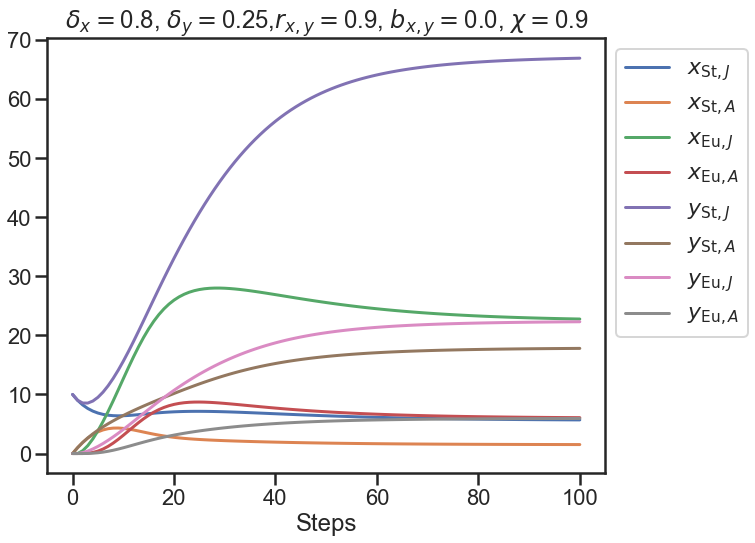

In [3]:
# (i) parameters
k = 50 # carrying capacity
f = 0.6 # fecundity
c = 0.1 # predation cost
chi = 0.9 # kin recognition
lam = 0.1 # development speed
dx = 0.8 # reproduction bias of x
dy = 0.25 # reproduction bias of y
rxy = 0.9 # genomic relatedness of x and y
bxy = 0.0 # encounter probability between x and y

# (ii) initial numbers
xStJ0 = 10 # initial number of juveniles of x with St morph
xStA0 = 0 # initial number of adults of x with St morph
xEuJ0 = 0 # initial number of juveniles of x with Eu morph
xEuA0 = 0 # initial number of adults of x with Eu morph
yStJ0 = 10 # initial number of juveniles of y with St morph
yStA0 = 0 # initial number of adults of y with St morph
yEuJ0 = 0 # initial number of juveniles of y with Eu morph
yEuA0 = 0 # initial number of adults of y with eu morph

t = 100 # number of steps 

sim = asexual_sim_two_gen(xStJ0, xStA0, xEuJ0, xEuA0, yStJ0, yStA0, yEuJ0, yEuA0, k, f, lam, c, chi, dx, dy, bxy, rxy, t)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(sim['xStJ'], label=r'$x_{\mathrm{St},J}$')
ax.plot(sim['xStA'], label=r'$x_{\mathrm{St},A}$')
ax.plot(sim['xEuJ'], label=r'$x_{\mathrm{Eu},J}$')
ax.plot(sim['xEuA'], label=r'$x_{\mathrm{Eu},A}$')
ax.plot(sim['yStJ'], label=r'$y_{\mathrm{St},J}$')
ax.plot(sim['yStA'], label=r'$y_{\mathrm{St},A}$')
ax.plot(sim['yEuJ'], label=r'$y_{\mathrm{Eu},J}$')
ax.plot(sim['yEuA'], label=r'$y_{\mathrm{Eu},A}$')


ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel(r'Steps')
ax.set_title(r'$\delta_x=$' + str(dx) + ', $\delta_y=$' + str(dy) +\
             ',$r_{x,y}=$' + str(rxy) + ', $b_{x,y}=$' + str(bxy) + ', $\chi=$' + str(chi))

plt.show()